<a href="https://colab.research.google.com/github/kimimumemo/Kapita-Selekta-Matematika-Terapan/blob/main/Gradient%2C%20Intercept%2C%20Sine%20%26%20Cosine%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama: Kimberley Blessinda  
* NPM: 6161801028


# Exercise 1


A line of best fit is a straight line that best approximates a collection of n data points.
In this exercise, we will assume that each point in the collection has an x coordinate
and a $y$ coordinate. The symbols $\bar{x}$ and $\bar{y}$ are used to represent the average $x$ value in
the collection and the average $y$ value in the collection respectively. The line of best
fit is represented by the equation $y = mx + b$ where $m$ and $b$ are calculated using
the following formulas:

\begin{equation}
m = \frac{\sum xy -\frac{(\sum x)(\sum y)}{n}}{\sum x^2 -\frac{(\sum x)^2}{n}}
\end{equation}

\begin{equation}
b = \bar{y} -m \bar{x}
\end{equation}

Write a program that reads a collection of points from the user. The user will enter
the first $x$ coordinate on its own line, followed by the first $y$ coordinate on its own
line. Allow the user to continue entering coordinates, with the $x$ and $y$ values each
entered on their own line, until your program reads a blank line for the x coordinate.
Display the formula for the line of best fit in the form $y = mx + b$ by replacing $m$
and b with the values calculated by the preceding formulas. For example, if the user
inputs the coordinates $(1, 1), (2, 2.1)$ and $(3, 2.9)$ then your program should display
$y = 0.95x + 0.1$. Additionally, plot the program using Matplotlib

## Load the dependencies

In [1]:
from statistics import mean
import matplotlib.pyplot as plt

## Input

In [2]:
n = int(input("Banyak input koordinat (dalam bilangan bulat): "))
x = []
y = []
for i in range(n):
  x.append(float(input("Tentukan bilangan untuk koordinat x (bilangan riil): ")))
  y.append(float(input("Tentukan bilangan untuk koordinat y (bilangan riil): ")))

Banyak input koordinat (dalam bilangan bulat): 3
Tentukan bilangan untuk koordinat x (bilangan riil): 1
Tentukan bilangan untuk koordinat y (bilangan riil): 1
Tentukan bilangan untuk koordinat x (bilangan riil): 2
Tentukan bilangan untuk koordinat y (bilangan riil): 2.1
Tentukan bilangan untuk koordinat x (bilangan riil): 3
Tentukan bilangan untuk koordinat y (bilangan riil): 2.9


In [3]:
print("Berikut merupakan titik-titik koordinat yang telah Anda input")
for i in range(n):
  print("Koordinat {} = ({},{})".format(i+1,x[i],y[i]))

Berikut merupakan titik-titik koordinat yang telah Anda input
Koordinat 1 = (1.0,1.0)
Koordinat 2 = (2.0,2.1)
Koordinat 3 = (3.0,2.9)


## Calculate Gradient (*m*)
Using the following formulas:
\begin{equation}
m = \frac{\sum xy -\frac{(\sum x)(\sum y)}{n}}{\sum x^2 -\frac{(\sum x)^2}{n}}
\end{equation}


In [4]:
# Definisikan variabel yang dibutuhkan.
sum_xy = 0
sum_x = 0
sum_y = 0
sum_of_x_sq = 0   # Sumasi dari x^{2}.
sq_sum_of_x = 1   # Kuadrat dari sumasi x.

In [5]:
for j,k in zip(x,y):
  sum_x += j
  sum_y += k
  sum_xy += j*k
  sum_of_x_sq += j**2

sq_sum_of_x = sum_x**2

In [6]:
# Formulasikan gradien
m = round((((sum_xy)-(sum_x*sum_y/n))/((sum_of_x_sq)-(sq_sum_of_x/n))),2)

## Calculate Intercept (*b*)
Using the following formulas:
\begin{equation}
b = \bar{y} -m \bar{x}
\end{equation}

In [7]:
mean_y = mean(y) # Mencari rata-rata dari y.
mean_x = mean(x) # Mencari rata-rata dari x.

b = round((mean_y - m*(mean_x)), 2)

## Plot

In [8]:
# Menghitung y baru berdasarkan m dan b.
y_plot = []
for i in range(n):
  y_new = m*x[i] + b
  y_plot.append(y_new)

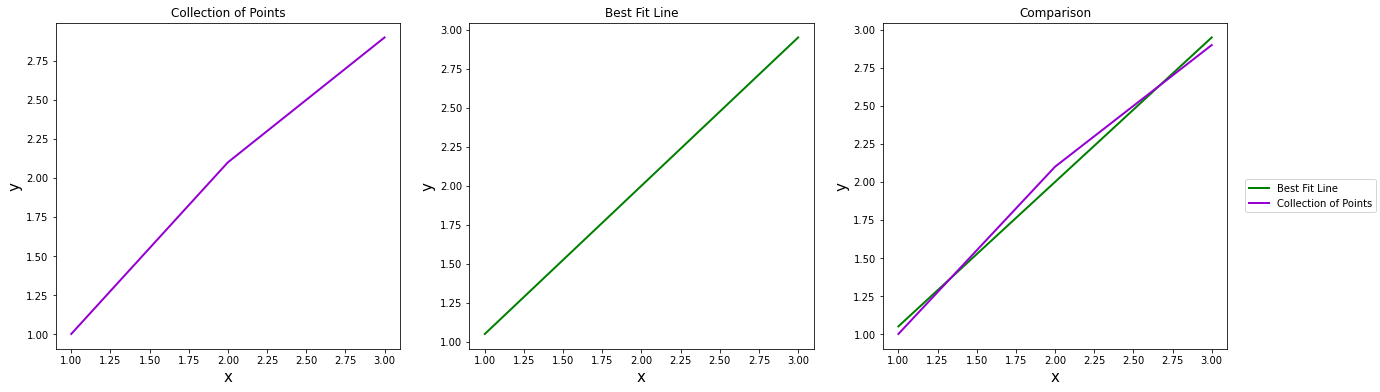

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(21,6)) 
ax[0].plot(x, y, c='darkviolet', lw=2) # Menghasilkan garis dari input koordinat titik yang diberikan.
ax[0].set_xlabel('x', size=15)
ax[0].set_ylabel('y', size=15)
ax[0].title.set_text('Collection of Points')

ax[1].plot(x, y_plot, c='green', lw=2) # Menghasilkan garis dari persamaan y = mx+b.
ax[1].set_xlabel('x', size=15)
ax[1].set_ylabel('y', size=15)
ax[1].title.set_text('Best Fit Line')

ax[2].plot(x, y_plot, c='green', lw=2, label='Best Fit Line')
ax[2].plot(x, y, c='darkviolet', lw=2, label='Collection of Points') 
ax[2].set_xlabel('x', size=15)
ax[2].set_ylabel('y', size=15)
ax[2].title.set_text('Comparison')

fig.legend(loc='right')
fig.show()

# Exercise 2

**Exercise 2**

Given a function of $\sin(x)$ where x in $[0, 2\pi]$. Make a simulation (plot) that a ball move from $x=0$ until $x=2\pi$ above the sin graph. Hint: Here the examples:


<center>  <img src = "https://i.imgur.com/AJehOhB.png" align = "center"> <img src = "https://i.imgur.com/i6eOSDQ.png" align = "center"> <img src = "https://i.imgur.com/RJZc1RY.png" align = "center"> <img src = "https://i.imgur.com/P0pYQMq.png" align = "center"></center> 

## Load the dependencies

In [10]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.image as mpimg

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


## Load custom image for marker point

In [12]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/kimimumemo/Kapita-Selekta-Matematika-Terapan/trunk/image_clo1.zip'.split())

!unzip "/content/image_clo1.zip" -d "/content"

Archive:  /content/image_clo1.zip
  inflating: /content/0.5.png        
  inflating: /content/__MACOSX/._0.5.png  
  inflating: /content/0.png          
  inflating: /content/__MACOSX/._0.png  
  inflating: /content/1.5.png        
  inflating: /content/__MACOSX/._1.5.png  
  inflating: /content/1.png          
  inflating: /content/__MACOSX/._1.png  
  inflating: /content/2.png          
  inflating: /content/__MACOSX/._2.png  
  inflating: /content/pikachu.png    
  inflating: /content/__MACOSX/._pikachu.png  


## Graphing

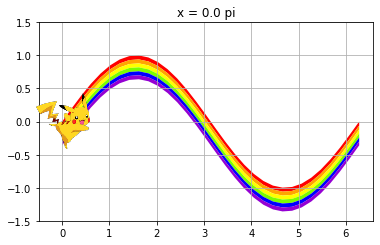

In [13]:
# Menyiapkan figur dan subplot pada daerah tempat kerja.
fig = plt.figure()
ax = fig.add_subplot(111, aspect=1.4)
ax.grid()
ax.set_xlim([-0.5, 2*np.pi+0.3])
ax.set_ylim([-1.5, 1.5])

# Menyesuaikan dari soal. "That a ball (pikachu) move from  𝑥=0  until  𝑥=2𝜋".
start=0
stop=2*np.pi
steps=32       # Menentukan berapa banyak langkah dari x=0 hingga 𝑥=2𝜋.

# Visualisasi grafik sin dari soal.
x = np.linspace(start, stop, steps)   
y = np.sin(x)

# Membuat tumpukan garis yang berwarna-warni dari variabel x dan y yang telah dideklarasikan
colors = ['red', 'orange', 'yellow', 'lawngreen','blue', 'darkviolet']
top = max(y)
lines = []
for i in range(len(colors)+1):
  spacing=0.06
  newline_data = y - top*spacing*i
  lines.append(newline_data)
for i, c in enumerate(colors):
  ax.fill_between(x, lines[i], lines[i+1], facecolor=c)

# Membuat ball yang berbentuk titik secara normal,
# pikachu, = ax.plot(x_array, y_array, c='black', marker='+')
# Perintah di atas hanya digunakan sebagai jalan pemikiran untuk membuat ball dengan gambar.

# Mendefinisikan gambar yang sudah diunduh pada cell "Load custom image for marker point".
img_read = mpimg.imread('/content/pikachu.png')
img_box = OffsetImage(img_read, zoom=0.4) 

# Mendefinisikan sebuah fungsi untuk melakukan animasi ball (pikachu) yang bergerak.
def update(x):   
  fig.gca()
  # pikachu.set_data(x, np.sin(x))
  ax.set_title('').set_text('x = {:.1f} pi'.format((x/(np.pi))))
  ab = AnnotationBbox(img_box, [x,np.sin(x)], frameon=False)
  ax.add_artist(ab)
  return 

# Animasi
anim = FuncAnimation(fig, update, frames=x, interval=10000)

In [14]:
# Menampilkan animasi berbentuk video.
rc('animation', html='html5')
# anim
# "anim" merupakan perintah untuk menampilkan animasi yang telah terbentuk berupa video.
#  Oleh karena format pengumpulan berupa file dengan ekstensi PDF,
#  maka saya melampirkan hasil snapshot animasi pada cell berikut.

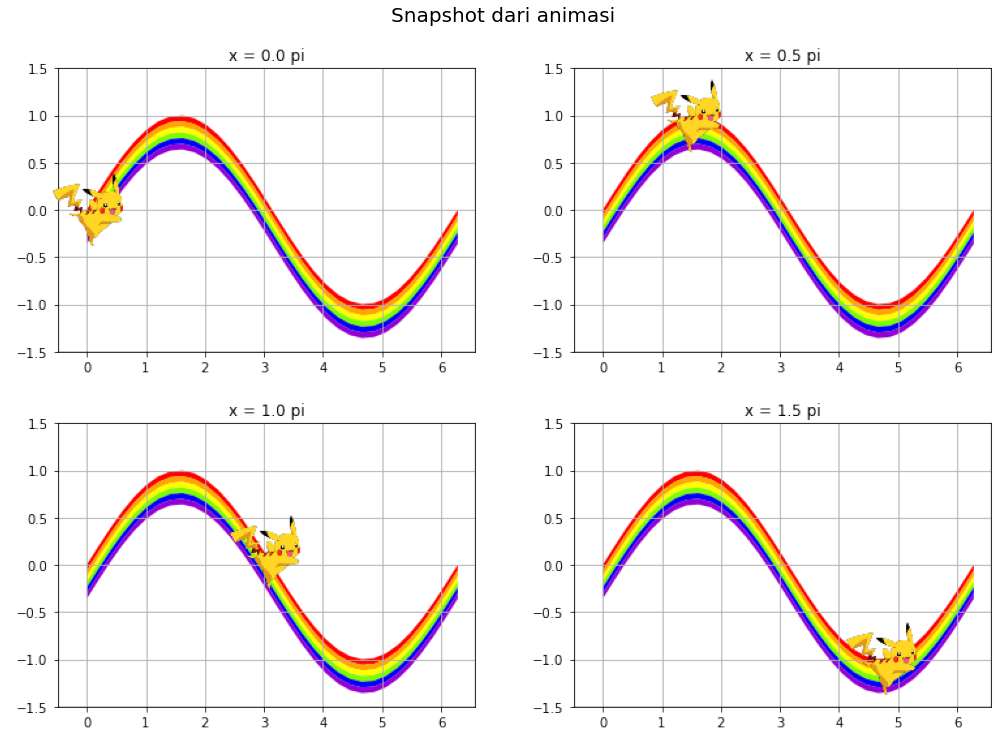

In [15]:
# Snapshot dari animasi pada x = {0.0, 0.5, 1.0, 1.5}
pika1 = mpimg.imread('/content/0.png')
pika2 = mpimg.imread('/content/0.5.png')
pika3 = mpimg.imread('/content/1.png')
pika4 = mpimg.imread('/content/1.5.png')

plt.figure(1, figsize=(15,10), tight_layout=True)
plt.suptitle('Snapshot dari animasi\n', size=20, y=1.03)

plt.subplot(221)
plt.imshow(pika1)
plt.axis('off')

plt.subplot(222)
plt.imshow(pika2)
plt.axis('off')

plt.subplot(223)
plt.imshow(pika3)
plt.axis('off')

plt.subplot(224)
plt.imshow(pika4)
plt.axis('off')

plt.show()